In [59]:
from mnist import MNIST
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [60]:
mndata = MNIST('./Data')
images, labels = mndata.load_training()
labels = labels.tolist()

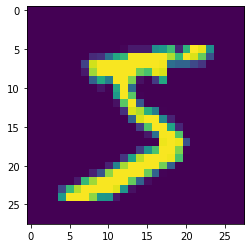

In [61]:
tmp = np.asarray(images[0])
tmp.resize((28, 28))
plt.imshow(tmp)

In [62]:
all_data = pd.DataFrame(images)

In [63]:
data = all_data

In [64]:
N = len(data)
N_train = int(len(data)*0.8)
N_test = N - N_train
print("N: {N}")
print("N_train: {N_train}")
print("N_test: {N_test}")

N: 60000
N_train: 48000
N_test: 12000


In [65]:
train = data.loc[0:N_train]
train_labels = labels[0:N_train+1]
train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
len(train)

48001

In [67]:
len(train_labels)

48001

In [68]:
test = data.loc[N_train+1:len(data)]
test_labels = labels[N_train+1:len(data)]
test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
48001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
len(test)

11999

In [70]:
len(test_labels)

11999

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train, train_labels)

KNeighborsClassifier(n_neighbors=3)

In [72]:
pred = knn.predict(test)
pred

array([7, 8, 8, ..., 5, 6, 8])

In [73]:
cm = confusion_matrix(pred, test_labels)
cm

array([[1187,    0,    6,    1,    0,    2,    1,    0,    8,    5],
       [   0, 1267,   13,    0,   12,    1,    1,   14,   10,    4],
       [   2,    1, 1141,    6,    0,    2,    1,    1,    3,    1],
       [   0,    0,    2, 1209,    0,   24,    0,    0,   14,   11],
       [   0,    1,    1,    0, 1144,    1,    1,    3,    5,   15],
       [   0,    0,    1,   11,    0, 1042,    1,    0,   21,    3],
       [   2,    1,    2,    1,    0,   16, 1165,    0,    3,    0],
       [   0,    1,   26,    3,    2,    3,    0, 1270,    5,    9],
       [   1,    0,    4,    7,    1,    1,    0,    0, 1122,    2],
       [   2,    1,    0,    4,   27,    5,    0,    9,    7, 1097]],
      dtype=int64)

In [74]:
np.trace(cm) / len(test)

0.9704142011834319